# Quantitative comparisons and statistical visualizations
**Visualizations can be used to compare data in a quantitative manner. This chapter explains several methods for quantitative visualizations.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Bar chart
Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the `medals` DataFrame. The DataFrame contains the countries as the index, and a column called `"Gold"` that contains the number of gold medals won by each country, according to their rows.

In [20]:
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)

- Call the `ax.bar` method to plot the `"Gold"` column as a function of the country.
- Use the `ax.set_xticklabels` to set the x-axis tick labels to be the country names.
- In the call to `ax.set_xticklabels` rotate the x-axis tick labels by 90 degrees by using the `rotation` key-word argument.
- Set the y-axis label to `"Number of medals"`.

<ipython-input-21-2a3708aa71cf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


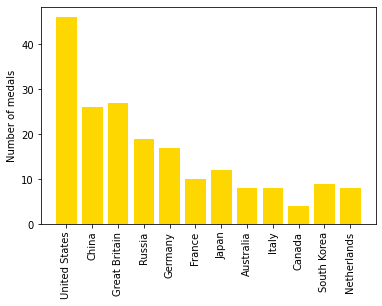

In [21]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'], color='gold')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

## Stacked bar chart
A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The *additional* height of this bar represents the value of this variable. And you can add more bars on top of that.

You will create a stacked bar chart that shows the number of gold, silver, and bronze medals won by each country, and you will add labels and create a legend that indicates which bars represent which medals.

- Call the `ax.bar` method to add the `"Gold"` medals. Call it with the `label` set to `"Gold"`.
- Call the `ax.bar` method to stack `"Silver"` bars on top of that, using the `bottom` key-word argument so the bottom of the bars will be on top of the gold medal bars, and `label` to add the label `"Silver"`.
- Use `ax.bar` to add `"Bronze"` bars on top of that, using the `bottom` key-word and `label` it as `"Bronze"`.

<ipython-input-22-1c455a8f544c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


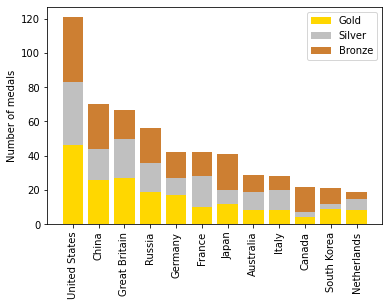

In [22]:
fid, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold',color='gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'],
       label='Silver', color='silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'],
       label='Bronze', color='#cd7f32')

ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel('Number of medals')

# Display the legend
ax.legend()

plt.show()

## Creating histograms
Histograms show the full distribution of a variable. In this exercise, we will display the distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them.

First, make two DataFrames to use. The first is called `mens_rowing` and includes information about the medalists in the men's rowing events. The other is called `mens_gymnastics` and includes information about medalists in all of the Gymnastics events.

In [23]:
summer2016 = pd.read_csv('summer2016.csv')

In [66]:
summer2016_mens = summer2016[summer2016['Sex'] == 'M']
mens_rowing = summer2016_mens[summer2016_mens['Sport'] == 'Rowing']
mens_gymnastics = summer2016_mens[summer2016_mens['Sport'] == 'Gymnastics']

- Use the `ax.hist` method to add a histogram of the "Weight" column from the `mens_rowing` DataFrame.
- Use `ax.hist` to add a histogram of "Weight" for the `mens_gymnastics` DataFrame.
- Set the x-axis label to "Weight (kg)" and the y-axis label to "# of observations".

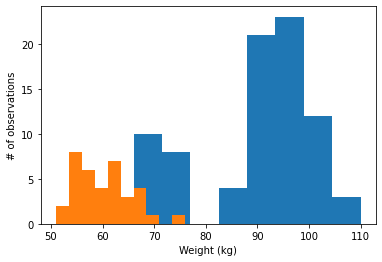

In [67]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Weight (kg)')

# Set the y-axis label to "# of observations
ax.set_ylabel('# of observations')

plt.show()

## "Step" histogram
Histograms allow us to see the distributions of the data in different groups in our data. In this exercise, you will select groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

In the exercise below, you will visualize and label the histograms of two sports: "Gymnastics" and "Rowing" and see the marked difference between medalists in these two sports.

- Use the `hist` method to display a histogram of the `"Weight"` column from the `mens_rowing` DataFrame, label this as `"Rowing"`.
- Use `hist` to display a histogram of the `"Weight"` column from the `mens_gymnastics` DataFrame, and label this as `"Gymnastics"`.
- For both histograms, use the 'histtype' argument to visualize the data using the `'step'` type and set the number of bins to use to 5.
- Add a legend to the figure, before it is displayed.

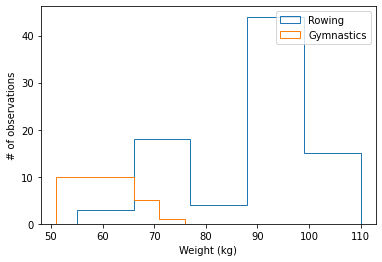

In [68]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label='Rowing', histtype='step',bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label='Gymnastics', histtype='step', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()

plt.show()

## Adding error-bars to a bar chart
Statistical plotting techniques add quantitative information for comparisons into the visualization. For example, in this exercise, we will add error bars that quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.

- Add a bar with size equal to the mean of the `"Height"` column in the `mens_rowing` DataFrame and an error-bar of its standard deviation.
- Add another bar for the mean of the `"Height"` column in `mens_gymnastics` with an error-bar of its standard deviation.
- Add a label to the the y-axis: `"Height (cm)"`.

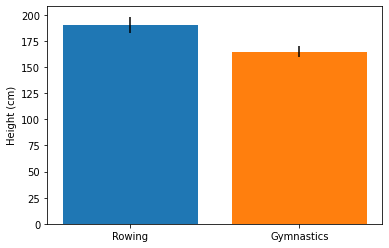

In [69]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar('Gymnastics', mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

*These error bars can help us see that the difference in heights is rather large in terms of the standard deviation within every group.*

## Adding error-bars to a plot
Adding error-bars to a plot is done by using the `errorbars` method of the `Axes` object.

There are two DataFrames: `seattle_weather` has data about the weather in Seattle and `austin_weather` has data about the weather in Austin. Each DataFrame has a column `"MONTH"` that has the names of the months, a column `"MLY-TAVG-NORMAL"` that has the average temperature in each month and a column `"MLY-TAVG-STDDEV"` that has the standard deviation of the temperatures across years.

In the exercise, you will plot the mean temperature across months and add the standard deviation at each point as y errorbars.

In [44]:
seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

- Use the `ax.errorbar` method to add the Seattle data: the `"MONTH"`column as x values, the `"MLY-TAVG-NORMAL"` as y values and `"MLY-TAVG-STDDEV"` as yerr values.
- Add the Austin data: the `"MONTH"` column as x values, the `"MLY-TAVG-NORMAL"` as y values and `"MLY-TAVG-STDDEV"` as yerr values.
- Set the y-axis label as `"Temperature (Fahrenheit)"`.

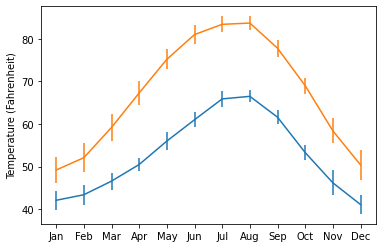

In [46]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], 
            yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'],
           yerr=austin_weather['MLY-TAVG-STDDEV']) 

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

## Creating boxplots
Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

In this exercise, you will use the data about medalist heights that you previously visualized as histograms, and as bar charts with error bars, and you will visualize it as boxplots.

- Create a boxplot that contains the `"Height"` column for `mens_rowing` on the left and `mens_gymnastics` on the right.
- Add x-axis tick labels: `"Rowing"` and `"Gymnastics"`.
- Add a y-axis label: `"Height (cm)"`.

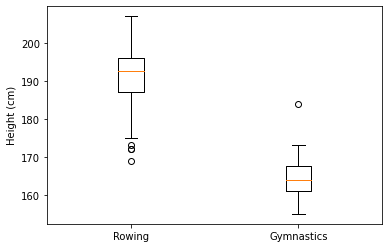

In [70]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

*This provides even more information. For example, we can see how many individuals are outliers within their group.*

## Simple scatter plot
Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

In this exercise, you will create a scatter plot of the `climate_change` data, which has a column `"co2"` that indicates the measurements of carbon dioxide every month and another column, `"relative_temp"` that indicates the temperature measured at the same time.. 


In [105]:
climate_change = pd.read_csv('climate_change.csv', index_col=0)

- Using the `ax.scatter` method, add the data to the plot: `"co2"` on the x-axis and `"relative_temp"` on the y-axis.
- Set the x-axis label to `"CO2 (ppm)"`.
- Set the y-axis label to `"Relative temperature (C)"`.

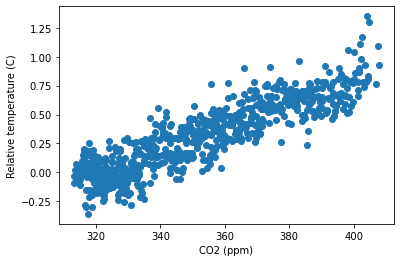

In [98]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

## Customizing scatter plots
We can customize scatter plots in a manner that is similar to the customization that we introduced in other plots. For example, if we want to show two bivariate comparisons side-by-side, we want to make sure that they are visually distinct. 

Here, we are going to plot two scatter plots on the same axes. In one, we'll show the data from the nineteen-eighties and in the other, we'll show the data from the nineteen-nineties. We can select these parts of the data using the time-series indexing that you've seen before to create two DataFrames called eighties and nineties. Then, we add each one of these DataFrames into the Axes object. 

- Add the data from the `eighties`. Set the color of the points to be `red` and label these data with the string `"eighties"`.
- Add the data from the `nineties`. Set the color of the points to be `blue` and label them with the string `"nineties"`. 
- Call the legend method to add a legend
- Add the axis labels and call `plt.show()`.

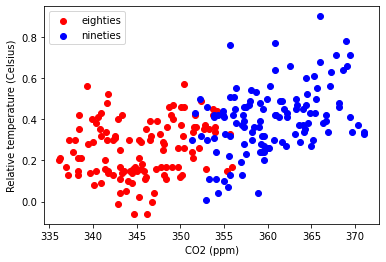

In [102]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()

ax.scatter(eighties["co2"], eighties["relative_temp"],
           color="red", label="eighties")

ax.scatter(nineties["co2"], nineties["relative_temp"],
           color="blue", label="nineties")

ax.legend()

ax.set_xlabel("CO2 (ppm)")

ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

*We can see that the relationship between temperatures and carbon dioxide didn't change much in **eighties**, but both levels of carbon dioxide and temperatures continued to rise in the **nineties**.*

## Encoding time by color
The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the `climate_change` dataset, plotting a scatter plot of the `"co2"` column, on the x-axis, against the `"relative_temp"` column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

- Using the `ax.scatter` method add a scatter plot of the `"co2"` column (x-axis) against the `"relative_temp"` column.
- Use the `c` key-word argument to pass in the index of the DataFrame as input to color each point according to its date.
- Set the x-axis label to `"CO2 (ppm)"` and the y-axis label to `"Relative temperature (C)"`.

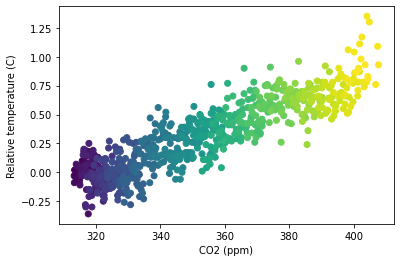

In [94]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'],
           c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

*Time of the measurements is encoded in the brightness of the color applied to the points, with dark blue points early on and later points in bright yellow.*